In [110]:
#importing libraries
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
from sklearn.cluster import KMeans
from numpy import unique
from numpy import where
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [2]:
#readind the data
data = pd.read_csv('C:/Users/fazal/Desktop/Uni/masters/Machine Learning/FinalProject/ML_data_G2/data.csv')
data.head()

,filename,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,10.ogg,0.172109,0.160323,1364.344456,1258.592175,2237.128139,0.076699,-252.416428,121.376038,-75.999443,...,-10.225346,-11.382644,-23.615202,-9.837443,2.837608,7.311616,15.285730,28.113136,13.851759,ney
1,100.ogg,0.144347,0.397188,2667.270693,2562.900506,5860.672895,0.071928,-121.873596,7.836360,-47.482792,...,11.913527,-2.081229,-12.192745,-2.550208,-0.366075,-2.494725,-1.881683,10.741643,5.378603,ney
2,101.ogg,0.143907,0.423747,2311.350857,2466.870951,5187.210300,0.058621,-146.173828,25.193405,-30.676767,...,13.588500,5.091373,-0.937903,-6.645022,-1.869061,-8.361086,-9.584910,-7.565945,-4.581150,ney
3,102.ogg,0.135277,0.415720,2359.148504,2448.678542,5272.793116,0.066651,-116.191879,33.266212,-30.781305,...,9.540560,-13.354314,-11.329946,-11.759642,-0.385233,-4.925459,2.783390,13.298392,7.341113,ney
4,103.ogg,0.146942,0.357927,1648.908938,2048.969301,3375.387923,0.056880,-142.883560,76.426750,-19.965134,...,-9.485208,-11.305043,-8.059875,-7.315244,1.998333,-7.306895,-9.482360,-3.459121,-2.967434,ney


In [3]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
data.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.172109,0.160323,1364.344456,1258.592175,2237.128139,0.076699,-252.416428,121.376038,-75.999443,-21.006634,...,-10.225346,-11.382644,-23.615202,-9.837443,2.837608,7.311616,15.285730,28.113136,13.851759,ney
1,0.144347,0.397188,2667.270693,2562.900506,5860.672895,0.071928,-121.873596,7.836360,-47.482792,-31.510834,...,11.913527,-2.081229,-12.192745,-2.550208,-0.366075,-2.494725,-1.881683,10.741643,5.378603,ney
2,0.143907,0.423747,2311.350857,2466.870951,5187.210300,0.058621,-146.173828,25.193405,-30.676767,-15.189541,...,13.588500,5.091373,-0.937903,-6.645022,-1.869061,-8.361086,-9.584910,-7.565945,-4.581150,ney
3,0.135277,0.415720,2359.148504,2448.678542,5272.793116,0.066651,-116.191879,33.266212,-30.781305,-19.073294,...,9.540560,-13.354314,-11.329946,-11.759642,-0.385233,-4.925459,2.783390,13.298392,7.341113,ney
4,0.146942,0.357927,1648.908938,2048.969301,3375.387923,0.056880,-142.883560,76.426750,-19.965134,-5.031665,...,-9.485208,-11.305043,-8.059875,-7.315244,1.998333,-7.306895,-9.482360,-3.459121,-2.967434,ney


In [4]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
print(y)

[0 0 0 ... 5 5 5]


In [20]:
#Normalizing the dataset
scaler = StandardScaler()
X_normalized = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
X_notNormalized=np.array(data.iloc[:, :-1], dtype = float)

In [31]:
#Lda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X_normalized, y).transform(X_normalized)

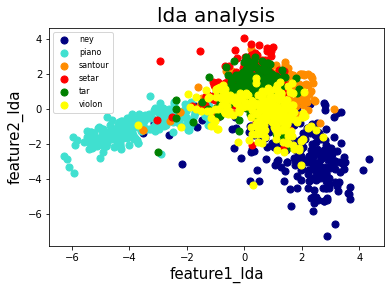

In [ ]:
#ploting lda
clusters = unique(data.label)
colors = ['navy', 'turquoise', 'darkorange','r','g','yellow']
for cluster,color in zip(clusters,colors):
    row_ix = where(data.label == cluster)
    plt.scatter(X_lda[row_ix, 0], X_lda[row_ix, 1], c = color, s = 50)
    

plt.xlabel('feature1_lda',fontsize=15)
plt.ylabel('feature2_lda',fontsize=15)
plt.title("lda analysis",fontsize=20)
plt.legend(clusters,prop={'size': 8})
plt.show()

<Figure size 432x288 with 0 Axes>

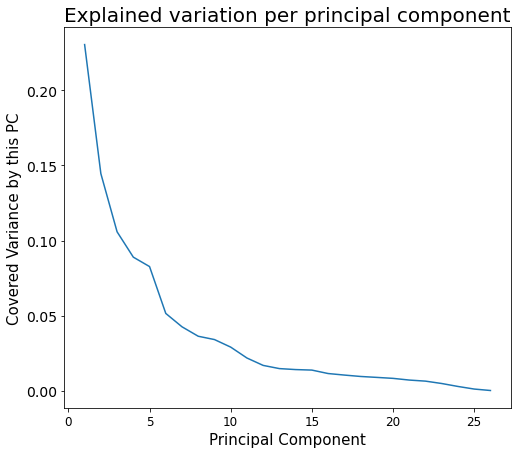

Explained variation per principal component for the first two PCs: [0.23036311 0.14454483]


In [48]:
#explained variation per pcs
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_music = PCA(n_components=26)
X_pca = pca_music.fit_transform(X_normalized)

xs = np.array(range(1,27))
plt.figure()
plt.figure(figsize=(8,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.plot(xs, pca_music.explained_variance_ratio_)
plt.xlabel('Principal Component',fontsize=15)
plt.ylabel('Covered Variance by this PC',fontsize=15)
plt.title("Explained variation per principal component",fontsize=20)
plt.show()
print('Explained variation per principal component for the first two PCs: {}'.format(pca_music.explained_variance_ratio_[0:2]))

In [46]:
#pca
from sklearn.decomposition import PCA
pca_music = PCA(n_components=26)
X_pca = pca_music.fit_transform(X_normalized)

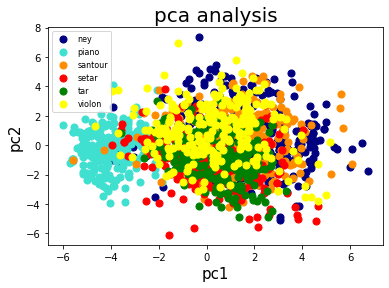

In [64]:
#ploting pca
clusters = unique(data.label)
colors = ['navy', 'turquoise', 'darkorange','r','g','yellow']
for cluster,color in zip(clusters,colors):
    row_ix = where(data.label == cluster)
    plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1], c = color, s = 50)
    
plt.xlabel('pc1',fontsize=15)
plt.ylabel('pc2',fontsize=15)
plt.title("pca analysis",fontsize=20)
plt.legend(clusters,prop={'size': 8})
plt.show()

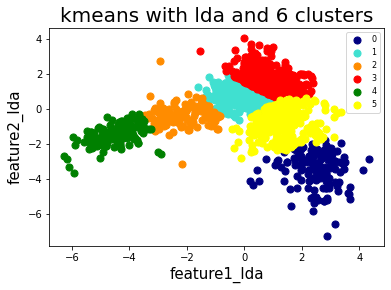

In [89]:
#Kmeans with lda and 6 clusters
model = KMeans(n_clusters= 6, random_state= 6)
y_pred_kmeans_lda6 = model.fit_predict(X_lda)

clusters = unique(y_pred_kmeans_lda6)
colors = ['navy', 'turquoise', 'darkorange','r','g','yellow']
for cluster,color in zip(clusters,colors):
    row_ix = where(y_pred_kmeans_lda6 == cluster)
    plt.scatter(X_lda[row_ix, 0], X_lda[row_ix, 1], c = color, s = 50)
    
plt.xlabel('feature1_lda',fontsize=15)
plt.ylabel('feature2_lda',fontsize=15)
plt.title("kmeans with lda and 6 clusters",fontsize=20)
plt.legend(clusters,prop={'size': 8})
plt.show()

In [103]:
#precision, recall, f1-score Kmeans with lda and 6 clusters
print(classification_report(y, y_pred_kmeans_lda6))

              precision    recall  f1-score   support

           0       0.96      0.56      0.71       256
           1       0.02      0.04      0.03       240
           2       0.08      0.04      0.05       241
           3       0.28      0.42      0.34       263
           4       0.01      0.00      0.01       232
           5       0.49      0.50      0.50       258

    accuracy                           0.27      1490
   macro avg       0.31      0.26      0.27      1490
weighted avg       0.32      0.27      0.28      1490



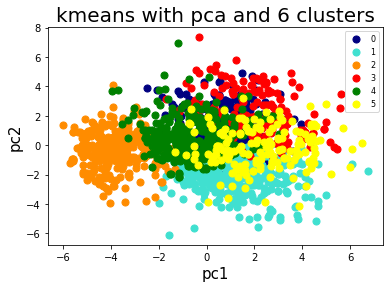

In [90]:
#kmeans with pca and 6 clusters
model = KMeans(n_clusters= 6, random_state= 6)
y_pred_kmeans_pca6 = model.fit_predict(X_pca)

clusters = unique(y_pred_kmeans_pca6)
colors = ['navy', 'turquoise', 'darkorange','r','g','yellow']
for cluster,color in zip(clusters,colors):
    row_ix = where(y_pred_kmeans_pca6 == cluster)
    plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1], c = color, s = 50)
    
plt.xlabel('pc1',fontsize=15)
plt.ylabel('pc2',fontsize=15)
plt.title("kmeans with pca and 6 clusters",fontsize=20)
plt.legend(clusters,prop={'size': 8})
plt.show()

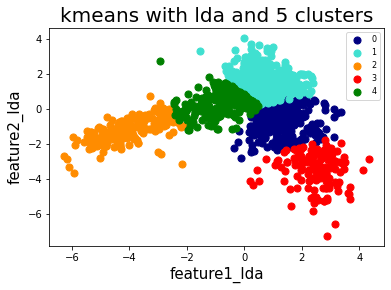

In [92]:
#Kmeans with lda and 5 clusters
model = KMeans(n_clusters= 5, random_state= 6)
y_pred_kmeans_lda5 = model.fit_predict(X_lda)

clusters = unique(y_pred_kmeans_lda5)
colors = ['navy', 'turquoise', 'darkorange','r','g','yellow']
for cluster,color in zip(clusters,colors):
    row_ix = where(y_pred_kmeans_lda5 == cluster)
    plt.scatter(X_lda[row_ix, 0], X_lda[row_ix, 1], c = color, s = 50)
    
plt.xlabel('feature1_lda',fontsize=15)
plt.ylabel('feature2_lda',fontsize=15)
plt.title("kmeans with lda and 5 clusters",fontsize=20)
plt.legend(clusters,prop={'size': 8})
plt.show()

In [104]:
#precision, recall, f1-score Kmeans with lda and 5 clusters
print(classification_report(y, y_pred_kmeans_lda5))

              precision    recall  f1-score   support

           0       0.33      0.36      0.34       256
           1       0.00      0.00      0.00       240
           2       0.01      0.01      0.01       241
           3       0.00      0.00      0.00       263
           4       0.17      0.20      0.19       232
           5       0.00      0.00      0.00       258

    accuracy                           0.09      1490
   macro avg       0.09      0.10      0.09      1490
weighted avg       0.09      0.09      0.09      1490



C:\Users\fazal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


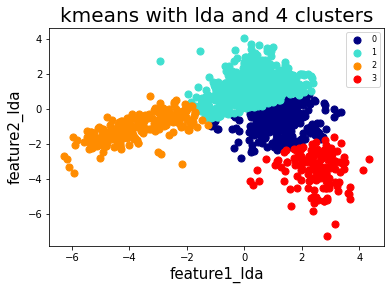

In [93]:
#Kmeans with lda and 4 clusters
model = KMeans(n_clusters= 4, random_state= 6)
y_pred_kmeans_lda4 = model.fit_predict(X_lda)

clusters = unique(y_pred_kmeans_lda4)
colors = ['navy', 'turquoise', 'darkorange','r','g','yellow']
for cluster,color in zip(clusters,colors):
    row_ix = where(y_pred_kmeans_lda4 == cluster)
    plt.scatter(X_lda[row_ix, 0], X_lda[row_ix, 1], c = color, s = 50)
    
plt.xlabel('feature1_lda',fontsize=15)
plt.ylabel('feature2_lda',fontsize=15)
plt.title("kmeans with lda and 4 clusters",fontsize=20)
plt.legend(clusters,prop={'size': 8})
plt.show()

In [105]:
#precision, recall, f1-score Kmeans with lda and 4 clusters
print(classification_report(y, y_pred_kmeans_lda4))

              precision    recall  f1-score   support

           0       0.32      0.36      0.34       256
           1       0.02      0.07      0.03       240
           2       0.02      0.02      0.02       241
           3       0.00      0.00      0.00       263
           4       0.00      0.00      0.00       232
           5       0.00      0.00      0.00       258

    accuracy                           0.08      1490
   macro avg       0.06      0.07      0.07      1490
weighted avg       0.06      0.08      0.07      1490



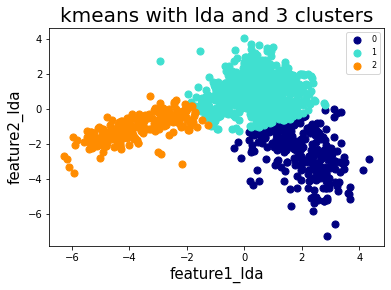

In [94]:
#Kmeans with lda and 3 clusters
model = KMeans(n_clusters= 3, random_state= 6)
y_pred_kmeans_lda3 = model.fit_predict(X_lda)

clusters = unique(y_pred_kmeans_lda3)
colors = ['navy', 'turquoise', 'darkorange','r','g','yellow']
for cluster,color in zip(clusters,colors):
    row_ix = where(y_pred_kmeans_lda3 == cluster)
    plt.scatter(X_lda[row_ix, 0], X_lda[row_ix, 1], c = color, s = 50)
    
plt.xlabel('feature1_lda',fontsize=15)
plt.ylabel('feature2_lda',fontsize=15)
plt.title("kmeans with lda and 3 clusters",fontsize=20)
plt.legend(clusters,prop={'size': 8})
plt.show()

In [106]:
#precision, recall, f1-score Kmeans with lda and 3 clusters
print(classification_report(y, y_pred_kmeans_lda3))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       256
           1       0.02      0.07      0.03       240
           2       0.02      0.02      0.02       241
           3       0.00      0.00      0.00       263
           4       0.00      0.00      0.00       232
           5       0.00      0.00      0.00       258

    accuracy                           0.16      1490
   macro avg       0.13      0.16      0.14      1490
weighted avg       0.14      0.16      0.15      1490



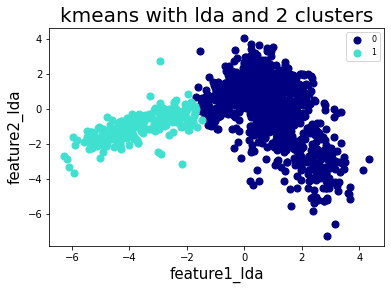

In [107]:
#Kmeans with lda and 2 clusters
model = KMeans(n_clusters= 2, random_state= 6)
y_pred_kmeans_lda2 = model.fit_predict(X_lda)

clusters = unique(y_pred_kmeans_lda2)
colors = ['navy', 'turquoise', 'darkorange','r','g','yellow']
for cluster,color in zip(clusters,colors):
    row_ix = where(y_pred_kmeans_lda2 == cluster)
    plt.scatter(X_lda[row_ix, 0], X_lda[row_ix, 1], c = color, s = 50)
    
plt.xlabel('feature1_lda',fontsize=15)
plt.ylabel('feature2_lda',fontsize=15)
plt.title("kmeans with lda and 2 clusters",fontsize=20)
plt.legend(clusters,prop={'size': 8})
plt.show()

In [108]:
#precision, recall, f1-score Kmeans with lda and 2 clusters
print(classification_report(y, y_pred_kmeans_lda2))

              precision    recall  f1-score   support

           0       0.20      0.97      0.33       256
           1       0.90      0.93      0.91       240
           2       0.00      0.00      0.00       241
           3       0.00      0.00      0.00       263
           4       0.00      0.00      0.00       232
           5       0.00      0.00      0.00       258

    accuracy                           0.32      1490
   macro avg       0.18      0.32      0.21      1490
weighted avg       0.18      0.32      0.20      1490



C:\Users\fazal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


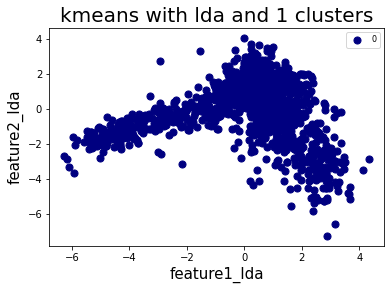

In [96]:
#Kmeans with lda and 1 clusters
model = KMeans(n_clusters= 1, random_state= 6)
y_pred_kmeans_lda1 = model.fit_predict(X_lda)

clusters = unique(y_pred_kmeans_lda1)
colors = ['navy', 'turquoise', 'darkorange','r','g','yellow']
for cluster,color in zip(clusters,colors):
    row_ix = where(y_pred_kmeans_lda1 == cluster)
    plt.scatter(X_lda[row_ix, 0], X_lda[row_ix, 1], c = color, s = 50)
    
plt.xlabel('feature1_lda',fontsize=15)
plt.ylabel('feature2_lda',fontsize=15)
plt.title("kmeans with lda and 1 clusters",fontsize=20)
plt.legend(clusters,prop={'size': 8})
plt.show()

In [109]:
#precision, recall, f1-score Kmeans with lda and 1 clusters
print(classification_report(y, y_pred_kmeans_lda1))

              precision    recall  f1-score   support

           0       0.17      1.00      0.29       256
           1       0.00      0.00      0.00       240
           2       0.00      0.00      0.00       241
           3       0.00      0.00      0.00       263
           4       0.00      0.00      0.00       232
           5       0.00      0.00      0.00       258

    accuracy                           0.17      1490
   macro avg       0.03      0.17      0.05      1490
weighted avg       0.03      0.17      0.05      1490



In [74]:
#defining a function for calculating metrics
from sklearn import metrics

from time import time

def clustering_fit_stats(estimator, name, data):
    
    t0 = time()
    y_pred = estimator.fit_predict(data)
    
    print('%-9s\t%.3fs\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f  %.3f'
          % (name, (time() - t0),
             metrics.adjusted_rand_score(y, y_pred),
             metrics.adjusted_mutual_info_score(y, y_pred),
             metrics.normalized_mutual_info_score(y, y_pred),
             metrics.homogeneity_score(y, y_pred),
             metrics.completeness_score(y, y_pred),
             metrics.v_measure_score(y,y_pred),
             metrics.silhouette_score(data, y_pred, metric='euclidean'),
             metrics.calinski_harabasz_score(data, y_pred),
             metrics.davies_bouldin_score(data, y_pred)))

In [88]:
#compare KMeans with different number of clusters
print('\n')
print('type\t\ttime\tR-Score\tAMI\tNMI\tHomo\tComp\tV-meas\tSilh\tCH-score  DB-score')
print(100 * '_')
clustering_fit_stats(KMeans(n_clusters= 2, random_state= 6), name="K-means2", data= X_lda)
clustering_fit_stats(KMeans(n_clusters= 3, random_state= 6), name="K-means3", data= X_lda)
clustering_fit_stats(KMeans(n_clusters= 4, random_state= 6), name="K-means4", data= X_lda)
clustering_fit_stats(KMeans(n_clusters= 5, random_state= 6), name="K-means5", data= X_lda)
clustering_fit_stats(KMeans(n_clusters= 6, random_state= 6), name="K-means6", data= X_lda)



type		time	R-Score	AMI	NMI	Homo	Comp	V-meas	Silh	CH-score  DB-score
____________________________________________________________________________________________________
K-means2 	0.070s	0.116	0.292	0.293	0.183	0.726	0.293	0.537	1154.994  0.631
K-means3 	0.048s	0.247	0.439	0.440	0.331	0.660	0.440	0.576	2309.087  0.583
K-means4 	0.109s	0.280	0.452	0.454	0.376	0.572	0.454	0.473	2177.828  0.711
K-means5 	0.110s	0.296	0.423	0.426	0.391	0.467	0.426	0.423	2246.471  0.748
K-means6 	0.100s	0.260	0.400	0.403	0.391	0.415	0.403	0.381	2222.457  0.802


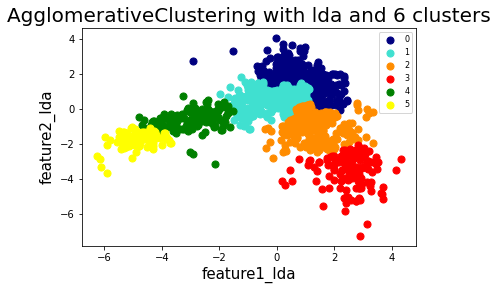

In [120]:
#AgglomerativeClustering with lda and 6 clusters
model = AgglomerativeClustering(n_clusters=6)
y_pred_AgglomerativeClustering_lda6 = model.fit_predict(X_lda)

clusters = unique(y_pred_AgglomerativeClustering_lda6)
colors = ['navy', 'turquoise', 'darkorange','r','g','yellow']
for cluster,color in zip(clusters,colors):
    row_ix = where(y_pred_AgglomerativeClustering_lda6 == cluster)
    plt.scatter(X_lda[row_ix, 0], X_lda[row_ix, 1], c = color, s = 50)
    
plt.xlabel('feature1_lda',fontsize=15)
plt.ylabel('feature2_lda',fontsize=15)
plt.title("AgglomerativeClustering with lda and 6 clusters",fontsize=20)
plt.legend(clusters,prop={'size': 8})
plt.show()

In [114]:
#precision, recall, f1-score AgglomerativeClustering with lda and 6 clusters
print(classification_report(y, y_pred_AgglomerativeClustering_lda6))

              precision    recall  f1-score   support

           0       0.01      0.02      0.01       256
           1       0.04      0.07      0.05       240
           2       0.04      0.04      0.04       241
           3       0.00      0.00      0.00       263
           4       0.03      0.02      0.03       232
           5       0.00      0.00      0.00       258

    accuracy                           0.02      1490
   macro avg       0.02      0.02      0.02      1490
weighted avg       0.02      0.02      0.02      1490



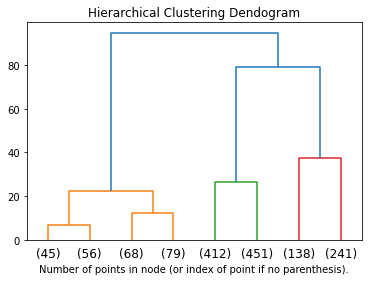

In [123]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X_lda)

# plot the top p levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=2)

plt.title('Hierarchical Clustering Dendogram')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

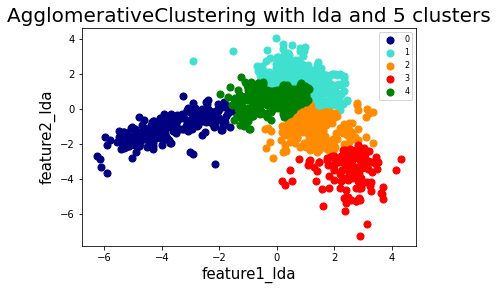

In [126]:
#AgglomerativeClustering with lda and 5 clusters
model = AgglomerativeClustering(n_clusters=5)
y_pred_AgglomerativeClustering_lda5 = model.fit_predict(X_lda)

clusters = unique(y_pred_AgglomerativeClustering_lda5)
colors = ['navy', 'turquoise', 'darkorange','r','g','yellow']
for cluster,color in zip(clusters,colors):
    row_ix = where(y_pred_AgglomerativeClustering_lda5 == cluster)
    plt.scatter(X_lda[row_ix, 0], X_lda[row_ix, 1], c = color, s = 50)
    
plt.xlabel('feature1_lda',fontsize=15)
plt.ylabel('feature2_lda',fontsize=15)
plt.title("AgglomerativeClustering with lda and 5 clusters",fontsize=20)
plt.legend(clusters,prop={'size': 8})
plt.show()

In [125]:
#precision, recall, f1-score AgglomerativeClustering with lda and 5 clusters
print(classification_report(y, y_pred_AgglomerativeClustering_lda5))

              precision    recall  f1-score   support

           0       0.02      0.02      0.02       256
           1       0.00      0.00      0.00       240
           2       0.04      0.04      0.04       241
           3       0.00      0.00      0.00       263
           4       0.22      0.39      0.28       232
           5       0.00      0.00      0.00       258

    accuracy                           0.07      1490
   macro avg       0.05      0.08      0.06      1490
weighted avg       0.04      0.07      0.05      1490



C:\Users\fazal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


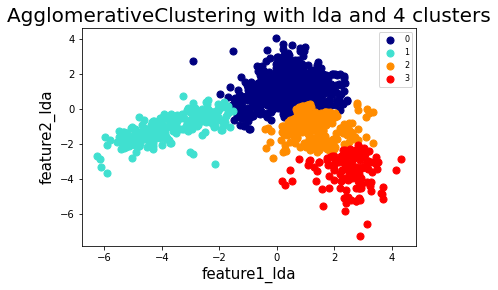

In [128]:
#AgglomerativeClustering with lda and 4 clusters
model = AgglomerativeClustering(n_clusters=4)
y_pred_AgglomerativeClustering_lda4 = model.fit_predict(X_lda)

clusters = unique(y_pred_AgglomerativeClustering_lda4)
colors = ['navy', 'turquoise', 'darkorange','r','g','yellow']
for cluster,color in zip(clusters,colors):
    row_ix = where(y_pred_AgglomerativeClustering_lda4 == cluster)
    plt.scatter(X_lda[row_ix, 0], X_lda[row_ix, 1], c = color, s = 50)
    
plt.xlabel('feature1_lda',fontsize=15)
plt.ylabel('feature2_lda',fontsize=15)
plt.title("AgglomerativeClustering with lda and 4 clusters",fontsize=20)
plt.legend(clusters,prop={'size': 8})
plt.show()

In [130]:
#precision, recall, f1-score AgglomerativeClustering with lda and 4 clusters
print(classification_report(y, y_pred_AgglomerativeClustering_lda4))

              precision    recall  f1-score   support

           0       0.02      0.07      0.03       256
           1       0.90      0.93      0.92       240
           2       0.04      0.04      0.04       241
           3       0.00      0.00      0.00       263
           4       0.00      0.00      0.00       232
           5       0.00      0.00      0.00       258

    accuracy                           0.17      1490
   macro avg       0.16      0.17      0.17      1490
weighted avg       0.16      0.17      0.16      1490



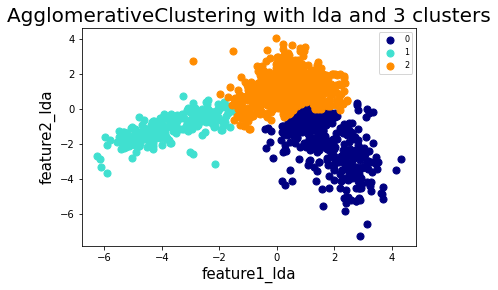

In [131]:
#AgglomerativeClustering with lda and 3 clusters
model = AgglomerativeClustering(n_clusters=3)
y_pred_AgglomerativeClustering_lda3 = model.fit_predict(X_lda)

clusters = unique(y_pred_AgglomerativeClustering_lda3)
colors = ['navy', 'turquoise', 'darkorange','r','g','yellow']
for cluster,color in zip(clusters,colors):
    row_ix = where(y_pred_AgglomerativeClustering_lda3 == cluster)
    plt.scatter(X_lda[row_ix, 0], X_lda[row_ix, 1], c = color, s = 50)
    
plt.xlabel('feature1_lda',fontsize=15)
plt.ylabel('feature2_lda',fontsize=15)
plt.title("AgglomerativeClustering with lda and 3 clusters",fontsize=20)
plt.legend(clusters,prop={'size': 8})
plt.show()

In [132]:
#precision, recall, f1-score AgglomerativeClustering with lda and 3 clusters
print(classification_report(y, y_pred_AgglomerativeClustering_lda3))

              precision    recall  f1-score   support

           0       0.61      0.91      0.73       256
           1       0.90      0.93      0.92       240
           2       0.26      0.94      0.41       241
           3       0.00      0.00      0.00       263
           4       0.00      0.00      0.00       232
           5       0.00      0.00      0.00       258

    accuracy                           0.46      1490
   macro avg       0.30      0.46      0.34      1490
weighted avg       0.29      0.46      0.34      1490



C:\Users\fazal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


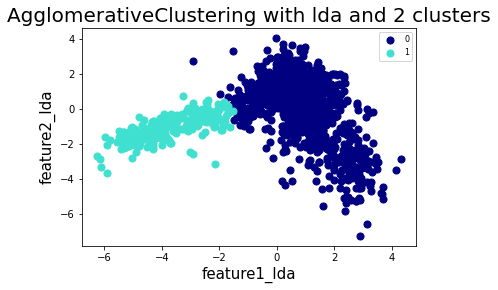

In [133]:
#AgglomerativeClustering with lda and 2 clusters
model = AgglomerativeClustering(n_clusters=2)
y_pred_AgglomerativeClustering_lda2 = model.fit_predict(X_lda)

clusters = unique(y_pred_AgglomerativeClustering_lda2)
colors = ['navy', 'turquoise', 'darkorange','r','g','yellow']
for cluster,color in zip(clusters,colors):
    row_ix = where(y_pred_AgglomerativeClustering_lda2 == cluster)
    plt.scatter(X_lda[row_ix, 0], X_lda[row_ix, 1], c = color, s = 50)
    
plt.xlabel('feature1_lda',fontsize=15)
plt.ylabel('feature2_lda',fontsize=15)
plt.title("AgglomerativeClustering with lda and 2 clusters",fontsize=20)
plt.legend(clusters,prop={'size': 8})
plt.show()

In [134]:
#precision, recall, f1-score AgglomerativeClustering with lda and 2 clusters
print(classification_report(y, y_pred_AgglomerativeClustering_lda2))

              precision    recall  f1-score   support

           0       0.20      0.98      0.33       256
           1       0.90      0.93      0.92       240
           2       0.00      0.00      0.00       241
           3       0.00      0.00      0.00       263
           4       0.00      0.00      0.00       232
           5       0.00      0.00      0.00       258

    accuracy                           0.32      1490
   macro avg       0.18      0.32      0.21      1490
weighted avg       0.18      0.32      0.21      1490



C:\Users\fazal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


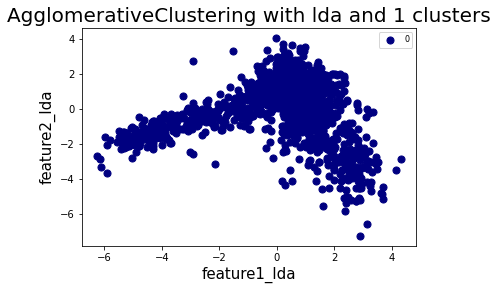

In [135]:
#AgglomerativeClustering with lda and 1 clusters
model = AgglomerativeClustering(n_clusters=1)
y_pred_AgglomerativeClustering_lda1 = model.fit_predict(X_lda)

clusters = unique(y_pred_AgglomerativeClustering_lda1)
colors = ['navy', 'turquoise', 'darkorange','r','g','yellow']
for cluster,color in zip(clusters,colors):
    row_ix = where(y_pred_AgglomerativeClustering_lda1 == cluster)
    plt.scatter(X_lda[row_ix, 0], X_lda[row_ix, 1], c = color, s = 50)
    
plt.xlabel('feature1_lda',fontsize=15)
plt.ylabel('feature2_lda',fontsize=15)
plt.title("AgglomerativeClustering with lda and 1 clusters",fontsize=20)
plt.legend(clusters,prop={'size': 8})
plt.show()

In [136]:
#precision, recall, f1-score AgglomerativeClustering with lda and 2 clusters
print(classification_report(y, y_pred_AgglomerativeClustering_lda2))

              precision    recall  f1-score   support

           0       0.20      0.98      0.33       256
           1       0.90      0.93      0.92       240
           2       0.00      0.00      0.00       241
           3       0.00      0.00      0.00       263
           4       0.00      0.00      0.00       232
           5       0.00      0.00      0.00       258

    accuracy                           0.32      1490
   macro avg       0.18      0.32      0.21      1490
weighted avg       0.18      0.32      0.21      1490



C:\Users\fazal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
#compare AgglomerativeClustering with different number of clusters
print('\n')
print('type\t\ttime\tR-Score\tAMI\tNMI\tHomo\tComp\tV-meas\tSilh\tCH-score  DB-score')
print(100 * '_')
clustering_fit_stats(AgglomerativeClustering(n_clusters= 2), name="Agglomerative-2", data= X_lda)
clustering_fit_stats(AgglomerativeClustering(n_clusters= 3), name="Agglomerative-3", data= X_lda)
clustering_fit_stats(AgglomerativeClustering(n_clusters= 4), name="Agglomerative-4", data= X_lda)
clustering_fit_stats(AgglomerativeClustering(n_clusters= 5), name="Agglomerative-5", data= X_lda)
clustering_fit_stats(AgglomerativeClustering(n_clusters= 6), name="Agglomerative-6", data= X_lda)



type		time	R-Score	AMI	NMI	Homo	Comp	V-meas	Silh	CH-score  DB-score
____________________________________________________________________________________________________
Agglomerative-2	0.078s	0.116	0.295	0.296	0.185	0.736	0.296	0.537	1152.010  0.627
Agglomerative-3	0.057s	0.279	0.439	0.440	0.339	0.630	0.440	0.535	2113.492  0.654
Agglomerative-4	0.059s	0.260	0.451	0.452	0.369	0.585	0.452	0.477	2087.986  0.684
Agglomerative-5	0.060s	0.288	0.415	0.417	0.387	0.453	0.417	0.350	1985.247  0.887
Agglomerative-6	0.060s	0.238	0.406	0.409	0.392	0.427	0.409	0.326	1937.013  0.899


In [139]:
#compare KMeans and AgglomerativeClustering
print('\n')
print('type\t\ttime\tR-Score\tAMI\tNMI\tHomo\tComp\tV-meas\tSilh\tCH-score  DB-score')
print(100 * '_')
clustering_fit_stats(AgglomerativeClustering(n_clusters= 6), name="Agglomerative-6", data= X_lda)
clustering_fit_stats(KMeans(n_clusters= 6, random_state= 6), name="K-means6", data= X_lda)



type		time	R-Score	AMI	NMI	Homo	Comp	V-meas	Silh	CH-score  DB-score
____________________________________________________________________________________________________
Agglomerative-6	0.093s	0.238	0.406	0.409	0.392	0.427	0.409	0.326	1937.013  0.899
K-means6 	0.104s	0.260	0.400	0.403	0.391	0.415	0.403	0.381	2222.457  0.802
